# Sheet 3

Johannes van de Locht, Finn Kalvelage, Anna Beckers

## Task 3

### a) Design a color map that could be used to visualize the aggregate statistics of vehicles sold in Germany in a given year, grouped by the vehicle’s manufacturer. Each sample point should have a color that reflects the manufacturer type and the number of vehicles sold in that year. Decide on a suitable color scheme and create a color legend that illustrates it. Justify your choices.


Assumptions:
- vehicles are further divided into subtypes
- all (sufficiently big/important) manufacturers in the world are represented if they have sold to germany
- car brands dont have a **unique** generally accepted distinctive color associated with them
    > This can have different reasons: too many manufacturers, too much overlap in used colors, changes in branding over time

Under these assumptions i would go with a bar chart with the x-axis having the manufacturers (sorted by no. of vehicles sold) and the y-axis showing the no. of cars sold. For the amount of vehicles types we went with the passenger car classification system of the European Commision which defines 9 distinct types [eu vehicle types](https://alternative-fuels-observatory.ec.europa.eu/general-information/vehicle-types). Based on this we used the website [colorbrewer2](https://colorbrewer2.org) from the slides to look at color schemes for qualitative (nominal) data with 9 classes. The website shows no colorblind safe scheme for this many classes, so the following non-safe scheme was choosen: ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00','#ffff33','#a65628','#f781bf','#999999'].

The amount of classes and therefore colors makes the visualization on first glance very confusing. But when focusing on a specific type the colors are sufficiently distinct, so that one can reason about the underlying data. 
This color scheme was choosen in favor of multiple others which used less saturated colors. This was done as color schemes were harder to tell apart at a glance.

The example chart could still be improved but even as it is now the colors do their job, by helping viewers compare the types more easily against or with each other.


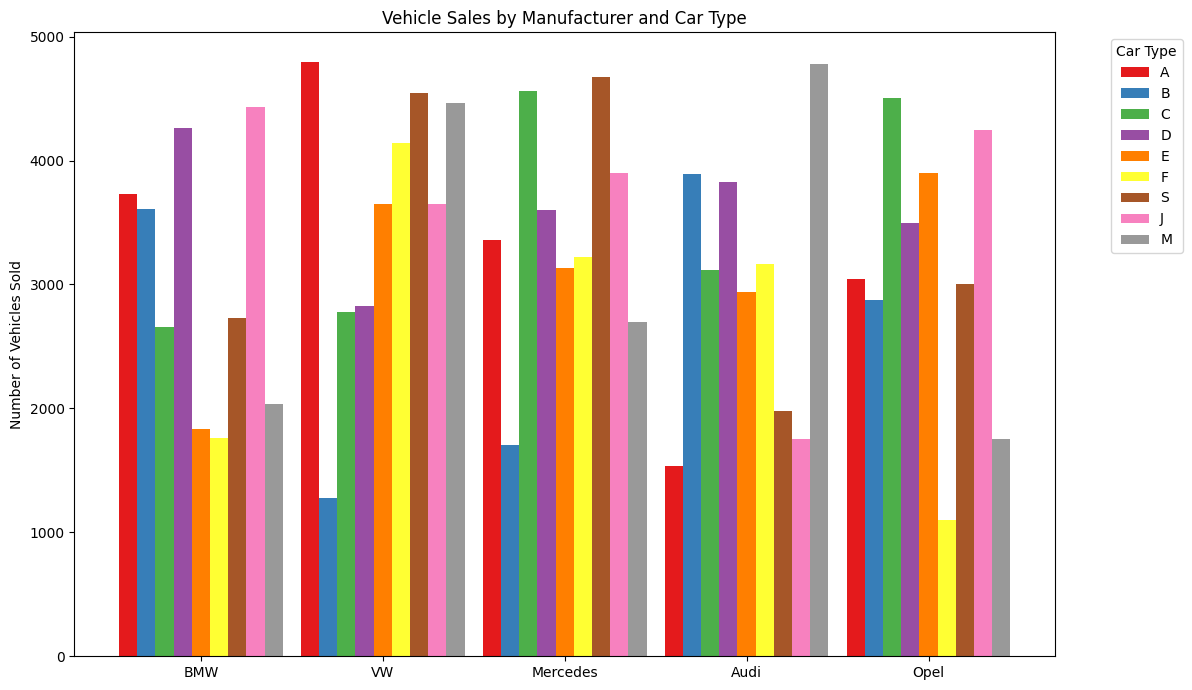

In [46]:
import matplotlib.pyplot as plt
import numpy as np

# Data setup
manufacturers = ['BMW', 'VW', 'Mercedes', 'Audi', 'Opel']
car_types = ["A","B","C","D","E","F","S","J","M"]
colors = ['#e41a1c','#377eb8','#4daf4a','#984ea3','#ff7f00',
          '#ffff33','#a65628','#f781bf','#999999']

# Generate dummy sales data (rows: manufacturers, columns: car types)
np.random.seed(0)
sales_data = np.random.randint(1000, 5000, size=(len(manufacturers), len(car_types)))

# Create Figure
fig, ax = plt.subplots(figsize=(12, 7))

bar_width = 0.1
indices = np.arange(len(manufacturers))

# Plot bars for each car type (grouped within each manufacturer)
for j in range(len(car_types)):
    # Extract the j-th type sales for all manufacturers
    sales = sales_data[:, j]
    ax.bar(indices + (j - 4) * bar_width, sales, bar_width, color=colors[j], label=car_types[j] if j == 0 else "")

# Axes and legend
ax.set_xticks(indices)
ax.set_xticklabels(manufacturers)
ax.set_ylabel('Number of Vehicles Sold')
ax.set_title('Vehicle Sales by Manufacturer and Car Type')
ax.legend(car_types, title="Car Type", bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()
plt.show()


### b) In Section 4.2 of the lecture slides, equations are provided to convert from RGB to HSV color space. Derive the inverse mapping, which should convert from HSV to RGB. Please specify intermediate steps. (4P)

In [47]:
hsv_60 = (60,0.4,0.9)
hsv_180 = (189,0.2,0.6)

# based on the slides and https://cs.stackexchange.com/questions/64549/convert-hsv-to-rgb-colors
def hsv_to_rgb(hsv_col):
    (H,S,V) = hsv_col
    # defined in slides
    M = V
    # slides: S = C/V
    C = S * V
    # slides: 1 - m/M = C/M
    m = M - C
    if 60 <= H < 180:
        # between 60 and 180 green is the "main" color
        # we set it to M(ax)
        G = M
        # between 60 and 180 blue is the color with the least impact
        # we set it to m(in)
        B = m
        # slides: (B-R)/C + 2 if green is the "main" color
        R = B - (H/60 - 2) * C
    elif 180 <= H < 300:
            # between 60 and 180 red is the color with the least impact
            # we set it to m(in)
            R = m
            # between 180 and 300 blue is the "main" color
            # we set it to M(ax)
            B = M
            # slides: (R-G)/C + 4 if blue is the "main" color
            G = R - (H/60 - 4) * C
    else:
        print("Unable to convert")
        R,G,B = 0
    print(R,G,B)
    print(int(R*255),int(G*255),int(B*255))

print("HSV (60,0.4,0.9) to RGB:")
hsv_to_rgb(hsv_60)
print("HSV (180,0.2,0.6) to RGB:")
hsv_to_rgb(hsv_180)

HSV (60,0.4,0.9) to RGB:
0.9000000000000001 0.9 0.54
229 229 137
HSV (180,0.2,0.6) to RGB:
0.48 0.582 0.6
122 148 153


## Task 4

### a) Propose a visual encoding of total population and life expectancy over time. Describe and justify your choice of chart type, axis range and scaling, and visualization channels.

I would propose a scatter plot with the years on the X-axis and the life expectancy on the Y-axis which both scale linearly. The scale of each data point is given by the population size. This makes the 3 main data points of year, life expectancy and total population easily visible and enables us to have the timeline on the X-axis. Each compared region will have their own color, to make comparisons easier.

### b) Read the dataset and filter/aggregate it so that you can compare the population and life expectancy in different parts of the world, but so that you do not retain more data than can be visualized in a meaningful way with your proposed design. Note that the dataset provides pre-aggregated data at different levels (cf. attribute “Type”). Implement your proposed visualization using a software package of your choice. Take care to keep your plot well-readable, and to include meaningful axis labels and legends. Point out at least two remarkable findings that can be observed in your visualization.

In [48]:
import plotly.express as px
import pandas as pd

df = pd.read_excel("./WPP2024_GEN_F01_DEMOGRAPHIC_INDICATORS_COMPACT.xlsx")


In [49]:
filtered_df = pd.DataFrame()

filtered_df['Region'] = df['Unnamed: 2']
filtered_df['Type'] = df['Unnamed: 8']
filtered_df['Year'] = df['Unnamed: 10']
filtered_df['Total Population'] = df['Unnamed: 11']
filtered_df['Total Population'] = df['Unnamed: 11']
filtered_df['Life Expectancy at Birth'] = df['Unnamed: 34']
filtered_df = filtered_df.iloc[16:]
filtered_df = filtered_df[filtered_df['Type'] != 'Label/Separator']
filtered_df = filtered_df.fillna(0)

C:\Users\Knniff\AppData\Local\Temp\ipykernel_39040\3566424737.py:11: FutureWarning:

Downcasting object dtype arrays on .fillna, .ffill, .bfill is deprecated and will change in a future version. Call result.infer_objects(copy=False) instead. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`



In [50]:


# Sadly i got stuck while trying to use ipywidgets
# Thats why the "interactivity" is now here:
# Set type to one of the following: ['World' 'SDG region' 'Development Group' 'Special other' 'Income Group' 'Region' 'Subregion' 'Country/Area']
type = 'Income Group'

type_filtered_df = filtered_df[filtered_df["Type"]== type]
print("Pick out the regions you want to compare from here, after choosing the correct type:")
print(type_filtered_df["Region"].unique())

regions = ['High-income countries','Low-income countries','Middle-income countries']

region_filtered_df = type_filtered_df[type_filtered_df['Region'].isin(regions)]

def show_plot():
    fig = px.scatter(region_filtered_df, x="Year", y="Life Expectancy at Birth", size="Total Population",
                     color="Region", hover_name="Region", title=f"Gapminder Data for {type}")
    fig.show()

show_plot()


Pick out the regions you want to compare from here, after choosing the correct type:
['High-and-upper-middle-income countries'
 'Low-and-Lower-middle-income countries' 'High-income countries'
 'Low-and-middle-income countries' 'Middle-income countries'
 'Upper-middle-income countries' 'Lower-middle-income countries'
 'Low-income countries' 'No income group available']


##### Finding 1:

When looking at the plot above and comparing the following income groups: 'High-income countries','Low-income countries','Middle-income countries' one can see countries with higher income have less outliers where the life expectancy drops for a year or a few years before growing steadily again.

In [51]:


# Sadly i got stuck while trying to use ipywidgets
# Thats why the "interactivity" is now here:
# Set type to one of the following: ['World' 'SDG region' 'Development Group' 'Special other' 'Income Group' 'Region' 'Subregion' 'Country/Area']
type = 'Development Group'

type_filtered_df = filtered_df[filtered_df["Type"]== type]
print("Pick out the regions you want to compare from here, after choosing the correct type:")
print(type_filtered_df["Region"].unique())

regions = ['More developed regions','Less developed regions', 'Least developed countries']

region_filtered_df = type_filtered_df[type_filtered_df['Region'].isin(regions)]

def show_plot():
    fig = px.scatter(region_filtered_df, x="Year", y="Life Expectancy at Birth", size="Total Population",
                     color="Region", hover_name="Region", title=f"Gapminder Data for {type}")
    fig.show()

show_plot()


Pick out the regions you want to compare from here, after choosing the correct type:
['More developed regions' 'Less developed regions'
 'Least developed countries'
 'Less developed regions, excluding least developed countries'
 'Less developed regions, excluding China']


##### Finding 2:
When comparing more developed and less developed regions in the plot above, one can see that the life expectancy of the less developed regions is slowly catching up to the more developed regions. From around a 22-27 year gap in 1950 to a 8-13 year gap in 2023. I found this remarkable as i would have expected that countries that improve their citizens life expectancy would also change from a less to a more developed country as other indicators would also improve.

### c) The dataset provides a lot of additional information. Formulate a question out of your own interest that can be answered with this data. Filter and visualize the data accordingly, and report your findings.

In which region did the corona pandemic have the biggest impact on the life expectancy?

In [52]:
# Sadly i got stuck while trying to use ipywidgets
# Thats why the "interactivity" is now here:
# Set type to one of the following: ['World' 'SDG region' 'Development Group' 'Special other' 'Income Group' 'Region' 'Subregion' 'Country/Area']
type = 'Region'
type_filtered_df = filtered_df[filtered_df["Type"]== type]

regions = ['Africa', 'Asia', 'Europe', 'Latin America and the Caribbean', 'Northern America', 'Oceania' ]
region_filtered_df = type_filtered_df[type_filtered_df['Region'].isin(regions)]

def show_plot():
    fig = px.scatter(region_filtered_df, x="Year", y="Life Expectancy at Birth", size="Total Population",
                     color="Region", hover_name="Region", title=f"Gapminder Data for {type}")
    fig.show()

show_plot()

When looking at the years 2020 and 2021 one can see the drop in life expectancy that was mostly caused by corona:

- Africa: -0.47
- Asia: -1.235
- Europe: -0.615
- Latin America and the Caribbean: -1.442
- Northern America: -0.54
- Oceania: -0.398

From this we can see that the biggest impact was in Latin America and the Caribbean closely followed by Asia. 

This was sadly not directly visible from the visualization, this could be improved by adding a value to the hover information which shows the difference between the current data point and the next or previous year.